# Data analyze and Visualizations

## Loading the datasets we created:

In [1]:
import pandas as pd

In [2]:
df_imdb = pd.read_csv("imdbData.csv", index_col=0)
df_rotten = pd.read_csv("rottenData.csv", index_col=0)
df_meta = pd.read_csv("metacriticData.csv", index_col=0)

# IMDB
#### will be marked in GOLD

In [3]:
df_imdb

,Title,IMDB Rating,IMDB Rank,Year,Classification,Genre
0,The Shawshank Redemption,9.3,1,1994,Young,Drama
1,The Godfather,9.2,2,1972,Young,Drama
2,The Dark Knight,9.0,3,2008,Young,Action
3,The Godfather: Part II,9.0,4,1974,Young,Drama
4,The Lord of the Rings: The Return of the King,8.9,5,2003,Young,Drama
...,...,...,...,...,...,...
245,The General,8.1,246,1926,NaN,Action
246,Before Sunset,8.0,247,2004,Adult,Drama
247,"Monsters, Inc.",8.0,248,2001,Young,Animation
248,Aladdin,8.0,249,1992,NaN,Animation


# ROTTEN TOMATO
#### will be marked in RED

In [4]:
df_rotten

,Title,Tomatometer,Rotten rank,Year,Critic Rating,Genre,Difference
0,Black Panther,9.6,1,2018,8.28,Action,1.32
1,Avengers: Endgame,9.4,2,2019,8.22,Action,1.18
2,Us,9.3,3,2019,7.95,Horror,1.35
3,Toy Story 4,9.7,4,2019,8.36,Animation,1.34
4,The Wizard of Oz,9.8,5,1939,9.40,Kids,0.40
...,...,...,...,...,...,...,...
95,Won't You Be My Neighbor?,9.7,96,2018,8.72,Documentary,0.98
96,Chinatown,9.9,97,1974,9.34,Drama,0.56
97,Lawrence of Arabia,9.8,98,1962,9.27,Action,0.53
98,I Am Not Your Negro,9.9,99,2017,8.89,Documentary,1.01


# META SCORE
#### will be marked in GREEN

In [5]:
df_meta

,Title,Metascore,Meta User Score,Metacritic Rank,Year
0,Citizen Kane,10.0,8.5,1,1941
1,The Godfather,10.0,9.2,2,1972
2,Rear Window,10.0,8.8,3,1954
3,Casablanca,10.0,9.0,4,1943
4,Boyhood,10.0,7.6,5,2014
...,...,...,...,...,...
995,Days of Glory,8.2,7.3,996,2006
996,My Summer of Love,8.2,8.8,997,2005
997,Isle of Dogs,8.2,8.0,998,2018
998,Mountain,8.2,5.3,999,2018


   # Visualizations:

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

# Pie charts for IMDB and Rotten Genres' fraction:

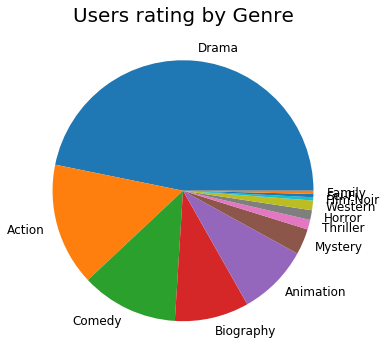

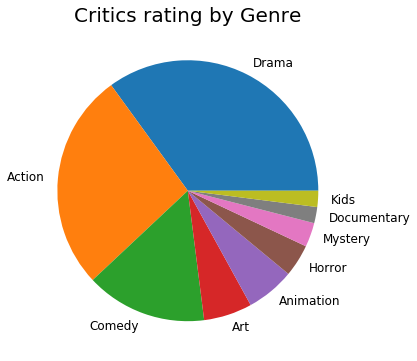

In [7]:
df_imdb['Genre'].value_counts(normalize=True).plot(kind='pie',figsize=(6,6),fontsize=12)
plt.title('Users rating by Genre',fontsize=20)
plt.ylabel('')
plt.show()

df_rotten['Genre'].value_counts(normalize=True).plot(kind='pie',figsize=(6,6),fontsize=12)
plt.title('Critics rating by Genre',fontsize=20)
plt.ylabel('')
plt.show()

### Top 3 favorite genres are shared between critics and audience.

### Critics give better score to action movies than audience.

#  

# Movies probability distribution by year for IMDB, Metacritic and Rotten:

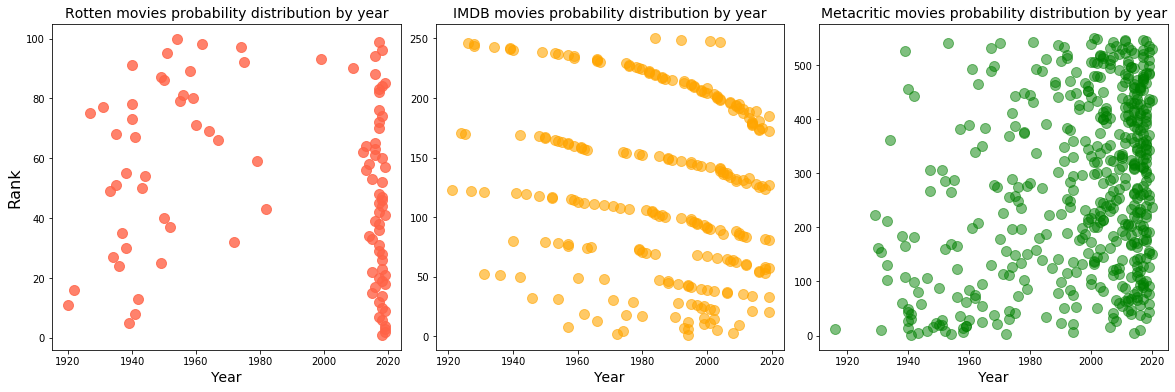

In [8]:
df_imdb2 = df_imdb[df_imdb['Year']>1920][:250] # top 100 optional
df_meta2 = df_meta[:500] # top 100 optional

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False,figsize=(20,6),gridspec_kw={'hspace': 0, 'wspace': 0.1},)


ax1.set_title('Rotten movies probability distribution by year',fontsize=14)
ax1.set_xlabel('Year',fontsize=14)
ax1.set_ylabel('Rank',fontsize=16)

ax2.set_title('IMDB movies probability distribution by year',fontsize=14)
ax2.set_xlabel('Year',fontsize=14)

ax3.set_title('Metacritic movies probability distribution by year',fontsize=14)
ax3.set_xlabel('Year',fontsize=14)


ax1.scatter(df_rotten['Year'], df_rotten['Rotten rank'],c='tomato',alpha=0.8,s=100)
ax2.scatter(df_imdb2['Year'], df_imdb2['IMDB Rank'],c='orange',alpha=0.6,s=100)
ax3.scatter(df_meta2['Year'], df_meta2['Metacritic Rank'],c='Green',alpha=0.5,s=100)

## As we can see, there is a big difference between the sites. 

### Rotten Tomatoes - gave high score for movies that was released around 2020.

### IMDB - Top 50 movies were released around 2000. Rest of the movies were spreaded equally: each 50 movies has a representive from each decade, in average.

### Metascore - In general, there is a wide scattering for movies over the years. Most of the movies from 2010 and above got high scores. It can be because of the awareness to internet and critisicm over the years.

# Rotten Tomatoes ranking - what is the real score?

## The graph represents the scores given by the site correlated to the ranks

Text(0.5, 0, 'IMDB rank')

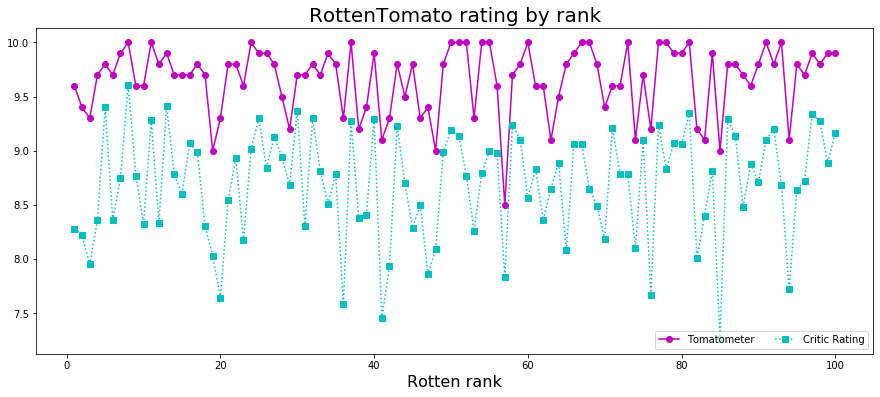

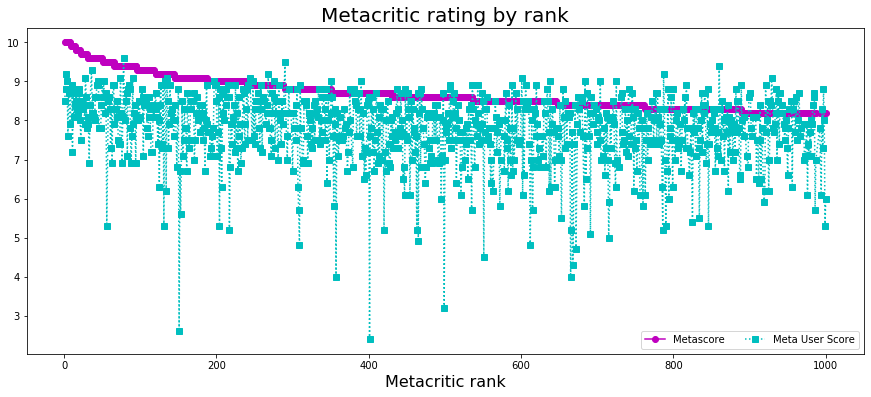

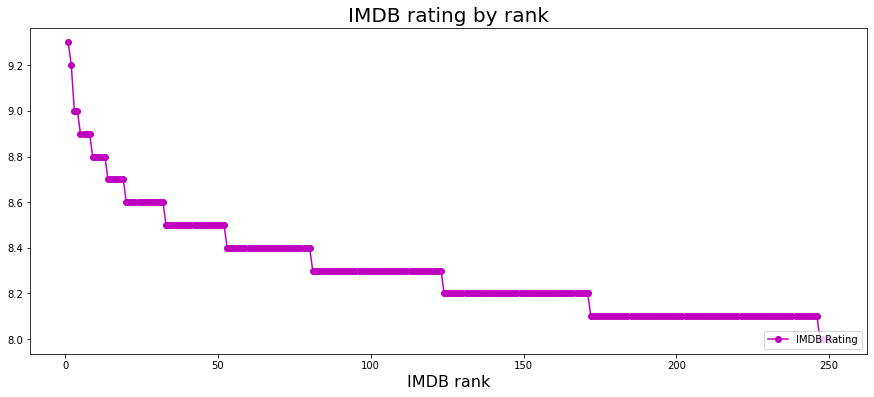

In [9]:
line=df_rotten.groupby(['Rotten rank']).mean()[['Tomatometer','Critic Rating']]
line.plot(style=['o-m','s:c'],figsize=(15,6)).legend(loc='lower right', ncol=2)
plt.title('RottenTomato rating by rank',fontsize=20)
plt.xlabel('Rotten rank',fontsize=16)

line=df_meta.groupby(['Metacritic Rank']).mean()[['Metascore','Meta User Score']]
line.plot(style=['o-m','s:c'],figsize=(15,6)).legend(loc='lower right', ncol=2)
plt.title('Metacritic rating by rank',fontsize=20)
plt.xlabel('Metacritic rank',fontsize=16)

line=df_imdb.groupby(['IMDB Rank']).mean()[['IMDB Rating']]
line.plot(style=['o-m'],figsize=(15,6)).legend(loc='lower right', ncol=2)
plt.title('IMDB rating by rank',fontsize=20)
plt.xlabel('IMDB rank',fontsize=16)

### Rotten Tomatoes: There is no correlation between high score and high rank. The movies that got the highests tomatometer and critic scores are not placed in the first places.

### Metacritic: There is no correlation between User Scores to the ranks. But there is a correlation with the metascore.

### IMDB: There is a full correlation between User Scores to the ranks.

# Analyzing the rating difference in rotten tomatoes:

In [10]:
df3 = df_rotten.sort_values(by='Difference', ascending=False).reset_index(drop=True)
df3

,Title,Tomatometer,Rotten rank,Year,Critic Rating,Genre,Difference
0,Shazam!,9.0,85,2019,7.26,Action,1.74
1,Zootopia,9.8,65,2016,8.08,Action,1.72
2,Thor: Ragnarok,9.3,36,2017,7.58,Action,1.72
3,Wonder Woman,9.3,20,2017,7.64,Action,1.66
4,Spider-Man: Far From Home,9.1,41,2019,7.45,Action,1.65
...,...,...,...,...,...,...,...
95,La La Land,9.1,63,2016,8.65,Comedy,0.45
96,The Wizard of Oz,9.8,5,1939,9.40,Kids,0.40
97,Citizen Kane,10.0,8,1941,9.61,Drama,0.39
98,Psycho,9.6,71,1960,9.21,Horror,0.39


## Difference by genres

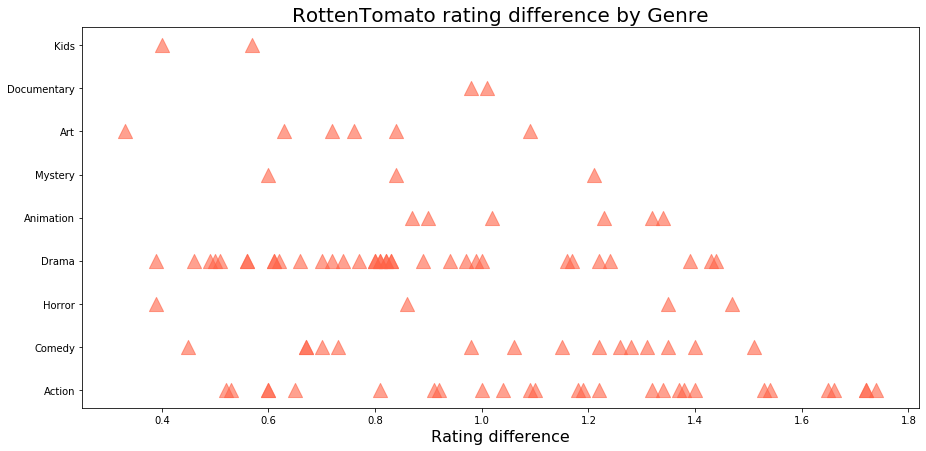

In [11]:
plt.figure(figsize=(15,7))
plt.scatter(df3['Difference'],df3['Genre'],c='tomato',marker="^",s=200, alpha=0.6)
plt.title('RottenTomato rating difference by Genre',fontsize=20)
plt.xlabel('Rating difference',fontsize=16)
plt.show()

### The biggest difference is in action movies. Drama is the biggest genre and the changes are not that big.

# Metacritic User Score difference:

In [12]:
#adding score difference column
df_meta['Score Difference'] = df_meta['Metascore']-df_meta['Meta User Score']
df_meta

,Title,Metascore,Meta User Score,Metacritic Rank,Year,Score Difference
0,Citizen Kane,10.0,8.5,1,1941,1.5
1,The Godfather,10.0,9.2,2,1972,0.8
2,Rear Window,10.0,8.8,3,1954,1.2
3,Casablanca,10.0,9.0,4,1943,1.0
4,Boyhood,10.0,7.6,5,2014,2.4
...,...,...,...,...,...,...
995,Days of Glory,8.2,7.3,996,2006,0.9
996,My Summer of Love,8.2,8.8,997,2005,-0.6
997,Isle of Dogs,8.2,8.0,998,2018,0.2
998,Mountain,8.2,5.3,999,2018,2.9


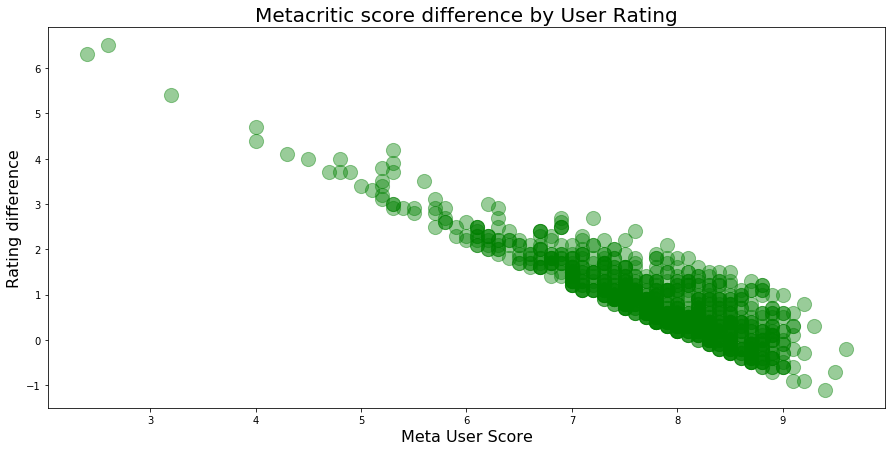

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(df_meta['Meta User Score'],df_meta['Score Difference'],c='Green',marker="o",s=200, alpha=0.4)
plt.title('Metacritic score difference by User Rating',fontsize=20)
plt.xlabel('Meta User Score',fontsize=16)
plt.ylabel('Rating difference',fontsize=16)
plt.show()

### We can see that when the user gives higher score, the difference is getting smaller. 

### Negative difference(User ranked the movie higher than the site) Exists but is not that big.

# Movie rating scale by years:

Text(0.5, 1.0, 'Number of movies by year')

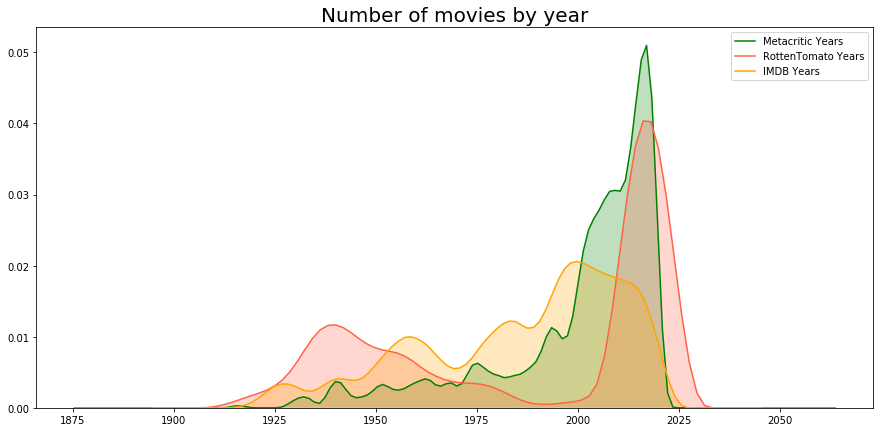

In [14]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_meta.Year, shade=True, kernel='triw',color='Green',label='Metacritic Years')
sns.kdeplot(df_rotten.Year, shade=True,kernel='triw',color='tomato',label='RottenTomato Years')
sns.kdeplot(df_imdb2.Year, shade=True,kernel='triw',color='orange',label='IMDB Years')
plt.title('Number of movies by year',fontsize=20)

### We can see that most successfull movies were released between 2000 to 2020 at all sites. That probably happends because of media and internet that was increased rapidly in that period of time.

In [15]:
print('IMDB median:', df_imdb['Year'].median())
print('Metacritic median:', df_meta['Year'].median())
print('Rotten median:', df_rotten['Year'].median())

IMDB median: 1993.0
Metacritic median: 2007.0
Rotten median: 2015.0


### IMDBs' most movies were released around 1993.

### Metacritics' most movies were released around 2007.

### Rottens' most movies were released around 2015.